# Objective

In this chapter we will get a hands on experience on the following:
0. Revision of the previous concepts
1. Data Preprocessing
    * Handling missing values 
    * Encoding Categorical Data
2. Filter the data

In [1]:
import pandas as pd
import numpy as np

# About Dataset
This dataset talks about life expectancy of different countries from a given range of years. There are a few other features that are mentioned in this data like Adult mortality, status of the country, infact deaths, total expenditure etc.

**Data's [link](https://github.com/bhav09/DataAnalysis-Course-MonSchool/tree/main/Chapter%202/Data).**

In [2]:
data=pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.shape

(2938, 22)

## Data Preprocessing
* Missing values and Imputation
* Encoding

In [6]:
print('Unique countries:',data.Country.nunique())
print('Unique year:',data.Year.nunique())

Unique countries: 193
Unique year: 16


In [7]:
print(data.Year.max())
print(data.Year.min())

2015
2000


In [8]:
#calculation to check whether each country has the data for 16 years or not
16*193

3088

In [13]:
data.select_dtypes(include=['object'])

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [14]:
data.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

### Missing values and Imputation

<img src='missingvalues.png'>

As the name suggests, missing values indicates having missing values. It basically is a situation in which the data isn't recorded for a particular row column combination. Usually denoted by 'NaN' which means Not a Number. It needs to be treated. In a scenario where it is bypassed without treatment it might cause in predicting not so accurate results and may also incur bias.

So to treat missing values, we use imputation techniques. Imputation bascially is replacing missing values. 

**Basic Ways to Impute values**
* Mean Imputation: Replacing missing values with Mean of the column.
* Median Imputation: Replacing with the Median of the column.
* Mode Imputation: Replacing with the Mode of the column.

However, there are scenarios where number of missing values are way too much to be imputed, in such a scenario it is better to drop the column. There is no hard and fast rule as to after what percentage of missing values in a column should it be dropped. It depends on the data.

In [17]:
#gives you the sum of all the missing values in respecitve columns
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
data.Polio=data.Polio.fillna(data.Polio.mean())
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
#filling the missing values with mean
data=data.fillna(data.mean())
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Encoding

<img src='categorialvariables.png'>

Whilst training machine learning models, the data needs to be fed in the language that machine understands which apparnetly is not the language that we use. Hence we encode so that the machine understands it. This phase of data prep is usually needed for training purposes. 

Here for encoding we would discuss a few types of Encoding:
* Label Encoding
* Ordinal Encoding
* One Hot Encoding

**Label Encoding** is used to encode values that are usually strings to integers so that it can be understood by machines. The value that is given to each value is in alphabetical order. For example we have 3 string values/categories for a column, Australia, India, UAE. So here if there are to be encoded, Australia would be encoded as 0, India 1 and UAE 2. 
In python, Label Encoder package can be found in sklearn.preprocessing class. It expects to encode only one variable at a time which usually is the 'y' or the dependent variable.

**Ordinal Encoding** is the same as Label Encoding but it can encode more than one columns. It can be found in sklearn.preprocessing against OrdinalEncoder.

While the idea for encoding be very noble however a machine may mistakenly take the categorical replacements as priority orders. Like integer 0 might be interpreted as low/high etc and the same's for highly valued replacements. This creates a bias whilst predicting. Hence to get rid of it, an even simpler form of encoding is used which emphasises on whether the value is present in the column or not. 

**One Hot Encoding** enables us to get rid of ordinal bias created by encoders. For each category a new column is created and then whether the columns is present or not is represented by 1 and 0 respectively. Eg: Country column has 3 countries, so this column will be replaced by 3 columns with each column representing each country and for the specific row, if the country is present then it is represented as 1 else 0.

<img src='one_hot_encoding.png'>

In [26]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

encoder=OrdinalEncoder()
df=encoder.fit_transform(data)
df=pd.DataFrame(df,columns=data.columns)

In [27]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,15.0,1.0,187.0,219.0,62.0,0.0,898.0,55.0,465.0,...,3.0,591.0,49.0,0.0,738.0,2102.0,156.0,160.0,174.0,72.0
1,0.0,14.0,1.0,145.0,225.0,64.0,0.0,911.0,52.0,316.0,...,35.0,593.0,46.0,0.0,750.0,671.0,159.0,162.0,171.0,71.0
2,0.0,13.0,1.0,145.0,223.0,66.0,0.0,909.0,54.0,291.0,...,38.0,589.0,48.0,0.0,768.0,2089.0,161.0,164.0,167.0,70.0
3,0.0,12.0,1.0,141.0,226.0,69.0,0.0,933.0,57.0,624.0,...,43.0,626.0,51.0,0.0,798.0,1462.0,163.0,166.0,160.0,69.0
4,0.0,11.0,1.0,138.0,229.0,71.0,0.0,175.0,58.0,640.0,...,44.0,572.0,52.0,0.0,118.0,1395.0,166.0,168.0,151.0,66.0


In [28]:
oe=OneHotEncoder(categorical_features=[0],sparse=False)
df=df.values
df

array([[  0.,  15.,   1., ..., 160., 174.,  72.],
       [  0.,  14.,   1., ..., 162., 171.,  71.],
       [  0.,  13.,   1., ..., 164., 167.,  70.],
       ...,
       [192.,   2.,   1., ...,  12., 124.,  71.],
       [192.,   1.,   1., ...,  16., 124.,  69.],
       [192.,   0.,   1., ..., 102., 131.,  69.]])

In [29]:
df=oe.fit_transform(df)
df.shape

C:\Users\91884\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\91884\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(2938, 214)

In [30]:
import numpy as np

print(np.unique(df[:,0:2]))
df[:,0:2]

[0. 1.]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## Filtering Data

<img src='filtering_data.png' width=500 align=left>

In [31]:
#filtering data
data[data['Status']=='Developing']['Total expenditure'].max()

17.24

In [32]:
#filtering data
data[data['Status']=='Developing']['GDP'].mean()

4792.531043856161

In [33]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [35]:
#Filtering on Multiple conditions
data[(data['Status']=='Developed') & (data['Year']==2010)]['Life expectancy '].unique() 

array([81.9, 84. , 80. , 73.4, 76.6, 79.5, 77.5, 79.2, 81. , 74.5, 81.8,
       86. , 83. , 72.8, 72.4, 88. , 89. , 76.3, 79.6, 82. , 75.1, 81.5,
       82.3, 78.7])

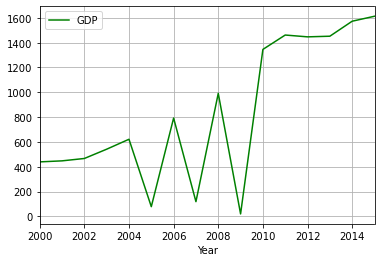

In [37]:
#plotting the visualisation for GDP of India
data[data['Country']=='India'].plot(x='Year',y='GDP',kind='line',c='green').grid()

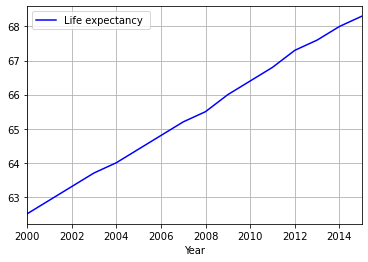

In [38]:
#plotting the  LIfe expectancy of India over the years
data[data['Country']=='India'].plot(x='Year',y='Life expectancy ',kind='line',c='blue').grid()

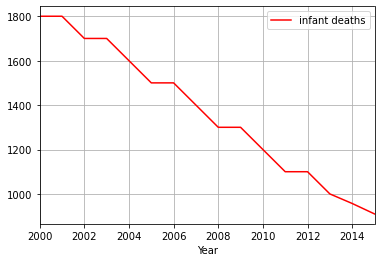

In [39]:
#Plotting infant deaths over year
data[data['Country']=='India'].plot(x='Year',y='infant deaths',kind='line',c='red').grid()

In [40]:
data[data['Country']=='India']['infant deaths'].min()

910

In [41]:
max_gdp_ind=data[data['Country']=='India'].GDP.max()
max_gdp_ind

1613.1887800000002

In [42]:
# To find number of countries who have better stats than India in 2015
data[(data['GDP']>max_gdp_ind) & (data['Status']=='Developing') & (data['Life expectancy ']>68) & (data['Year']==2015) & (data['infant deaths']<910)].Country.nunique()

71

In [43]:
# To find how the rank of India in the hence mentioned years
years=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
rank=[]
for year in years:
    gdp=float(data[(data['Country']=='India') & (data['Year']==year)].GDP)
    le=float(data[(data['Country']=='India') & (data['Year']==year)]['Life expectancy '])
    inf_death=int(data[(data['Country']=='India') & (data['Year']==year)]['infant deaths'])
    no_of_countries=data[(data['GDP']>gdp) & (data['Status']=='Developing') & (data['Life expectancy ']>le) & (data['Year']==year) & (data['infant deaths']<inf_death)].Country.nunique()
    rank.append(no_of_countries)

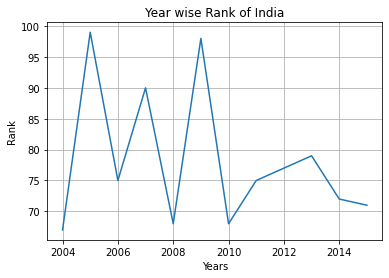

In [44]:
import matplotlib.pyplot as plt

plt.plot(years,rank)
plt.title('Year wise Rank of India')
plt.xlabel('Years')
plt.ylabel('Rank')
plt.grid()